Covariant Matrix:  [[ 0.68656811 -0.0372787   1.27036233  0.51534691]
 [-0.0372787   0.18792128 -0.31673091 -0.11574868]
 [ 1.27036233 -0.31673091  3.09637221  1.28912434]
 [ 0.51534691 -0.11574868  1.28912434  0.57956557]]

Eigen Values:  [0.02384304 0.07905128 0.24314579 4.20438706]
Eigen Vectors:  [[ 0.3172613   0.58115529  0.6558202  -0.36263433]
 [-0.32408808 -0.59619427  0.73001455  0.08122848]
 [-0.47972477 -0.07265649 -0.17703033 -0.85629752]
 [ 0.75111672 -0.54911925 -0.07509244 -0.35868209]]

Sorted Eigen Values:  (4.204387062618796, 0.2431457932719665, 0.07905127565884085, 0.023843040588977335)
Sorted Eigen Vectors:  (array([ 0.75111672, -0.54911925, -0.07509244, -0.35868209]), array([-0.47972477, -0.07265649, -0.17703033, -0.85629752]), array([-0.32408808, -0.59619427,  0.73001455,  0.08122848]), array([ 0.3172613 ,  0.58115529,  0.6558202 , -0.36263433]))


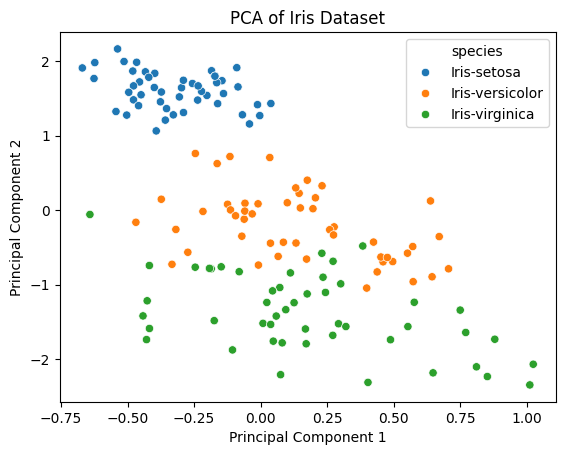

In [25]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('iris.csv')

X = data.iloc[: , :-1]
y = data.iloc[: , -1]

X_mean = X - X.mean(axis = 0)
matrix = np.cov(X_mean.T)
print('Covariant Matrix: ' , matrix )
print(end = '\n')

eigen_val , eigen_vec = np.linalg.eigh(matrix)
print('Eigen Values: ' , eigen_val)
print('Eigen Vectors: ' , eigen_vec)
print(end = '\n')
eigen_val_sorted, eigen_vec_sorted = zip(*sorted(zip(eigen_val, eigen_vec), reverse=True))
print('Sorted Eigen Values: ' , eigen_val_sorted)
print('Sorted Eigen Vectors: ' , eigen_vec_sorted)

# Choose the first two principal components
n_components = 2
eigen_vec_subset = np.array(eigen_vec_sorted[:n_components])

# Transform the data
X_reduced = np.dot(X_mean, eigen_vec_subset.T)  # Transpose eigen_vec_subset

# Create a DataFrame of the reduced dataset
reduced_data = pd.DataFrame(X_reduced, columns=['sepal.length', 'sepal.width'])

# Concatenate the reduced dataset with the target variable (labels)
reduced_data_with_labels = pd.concat([reduced_data, y.rename('species')], axis=1)

# Plot the results
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='sepal.length', y='sepal.width', hue='species', data=reduced_data_with_labels)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

